In [81]:
import pandas as pd 
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import lightgbm as lgb

In [82]:
train_df = pd.read_csv("./Dataset/train.csv")
test_df = pd.read_csv("./Dataset/test.csv")

In [83]:
train_df_c = train_df.copy()
test_df_c = test_df.copy()

In [58]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6548 entries, 0 to 6547
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Student ID                      6548 non-null   object 
 1   Age                             6456 non-null   float64
 2   Gender                          6548 non-null   object 
 3   Home Region                     6546 non-null   object 
 4   Home City                       6546 non-null   object 
 5   Program ID                      6548 non-null   object 
 6   Program Main Category Code      6548 non-null   object 
 7   Program Sub Category Code       5613 non-null   object 
 8   Technology Type                 3566 non-null   object 
 9   Program Skill Level             4902 non-null   object 
 10  Program Presentation Method     6548 non-null   object 
 11  Program Start Date              6548 non-null   object 
 12  Program End Date                65

# Feature Engieerning

In [59]:
# First feature is is gpa_grade
# in gpa system of 5 the grading is as follows 
# 2.00- 2.74 Acceptable
# 2.75 - 3.74 Good
# 3.75 - 4.49 Very Good
# 4.5 - 5 Excellent

# in gpa system of 4 the grading is as follows 
# 1.00- 1.74 Acceptable
# 1.75 - 2.74 Good
# 2.75 - 3.49 Very Good
# 3.5 - 4 Excellent



In [60]:
def classify_gpa(score, system):
    if system == 5:
        if 2.00 <= score <= 2.74:
            return "Acceptable"
        elif 2.75 <= score <= 3.74:
            return "Good"
        elif 3.75 <= score <= 4.49:
            return "Very Good"
        elif 4.5 <= score <= 5.00:
            return "Excellent"
        else:
            return "Not Applicable"
    elif system == 4:
        if 1.00 <= score <= 1.74:
            return "Acceptable"
        elif 1.75 <= score <= 2.74:
            return "Good"
        elif 2.75 <= score <= 3.49:
            return "Very Good"
        elif 3.5 <= score <= 4.00:
            return "Excellent"
        else:
            return "Not Applicable"
    else:
        return "Unknown System"

train_df_c['GPA_Grade'] = train_df_c.apply(lambda x: classify_gpa(x['University Degree Score'], x['University Degree Score System']), axis=1)

train_df_c[['University Degree Score', 'University Degree Score System', 'GPA_Grade']].head()


,University Degree Score,University Degree Score System,GPA_Grade
0,2.44,4.0,Good
1,5.00,5.0,Excellent
2,3.50,5.0,Good
3,3.55,5.0,Good
4,4.00,5.0,Very Good


## How ***far*** each city is from riyadh is
## that could play a big factor

In [61]:
unq_cites=train_df["Home City"].unique()
len(unq_cites)

93

# Encoding 

In [62]:
train_df_c.columns

Index(['Student ID', 'Age', 'Gender', 'Home Region', 'Home City', 'Program ID',
       'Program Main Category Code', 'Program Sub Category Code',
       'Technology Type', 'Program Skill Level', 'Program Presentation Method',
       'Program Start Date', 'Program End Date', 'Program Days',
       'Completed Degree', 'Level of Education', 'Education Speaciality',
       'College', 'University Degree Score', 'University Degree Score System',
       'Employment Status', 'Job Type', 'Still Working', 'Y', 'GPA_Grade'],
      dtype='object')

In [63]:
le = LabelEncoder()
categorical_features = ['Gender', 'Home Region', 'Home City', 'Program ID', 
                        'Program Main Category Code', 'Program Sub Category Code', 
                        'Technology Type', 'Program Skill Level', 
                        'Program Presentation Method', 'Completed Degree', 
                        'Level of Education', 'Education Speaciality', 'College', 
                        'Employment Status', 'Job Type','Still Working',"Student ID","GPA_Grade"]

for feature in categorical_features:
    train_df_c[feature] = le.fit_transform(train_df_c[feature])


In [64]:
train_df_c.head()

,Student ID,Age,Gender,Home Region,Home City,Program ID,Program Main Category Code,Program Sub Category Code,Technology Type,Program Skill Level,...,Level of Education,Education Speaciality,College,University Degree Score,University Degree Score System,Employment Status,Job Type,Still Working,Y,GPA_Grade
0,1598,37.0,1,4,23,65,6,6,3,3,...,0,819,9,2.44,4.0,3,4,2,0,2
1,97,21.0,1,10,62,180,1,9,3,2,...,0,312,6,5.00,5.0,1,4,2,0,1
2,1126,24.0,1,4,23,197,1,11,3,2,...,0,127,9,3.50,5.0,4,4,2,0,2
3,443,23.0,1,4,23,43,9,10,3,3,...,0,575,9,3.55,5.0,0,4,2,0,2
4,3089,23.0,1,4,23,188,2,9,0,2,...,0,747,8,4.00,5.0,6,4,2,0,5


# Analysis after encoding

In [65]:
train_df_c

,Student ID,Age,Gender,Home Region,Home City,Program ID,Program Main Category Code,Program Sub Category Code,Technology Type,Program Skill Level,...,Level of Education,Education Speaciality,College,University Degree Score,University Degree Score System,Employment Status,Job Type,Still Working,Y,GPA_Grade
0,1598,37.0,1,4,23,65,6,6,3,3,...,0,819,9,2.44,4.0,3,4,2,0,2
1,97,21.0,1,10,62,180,1,9,3,2,...,0,312,6,5.00,5.0,1,4,2,0,1
2,1126,24.0,1,4,23,197,1,11,3,2,...,0,127,9,3.50,5.0,4,4,2,0,2
3,443,23.0,1,4,23,43,9,10,3,3,...,0,575,9,3.55,5.0,0,4,2,0,2
4,3089,23.0,1,4,23,188,2,9,0,2,...,0,747,8,4.00,5.0,6,4,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6543,4166,31.0,0,4,23,76,2,9,3,3,...,0,487,8,4.40,5.0,6,4,2,0,5
6544,1109,27.0,0,5,45,204,6,6,3,0,...,0,638,9,4.46,5.0,4,4,2,0,5
6545,5097,24.0,0,4,23,2,6,6,0,0,...,0,738,8,4.93,5.0,4,3,1,1,1
6546,1532,25.0,1,4,23,134,6,6,3,2,...,0,487,8,4.00,4.0,3,0,0,0,1


In [66]:
gpa = train_df_c.groupby(["University Degree Score","Y"])
gpa

<Axes: >

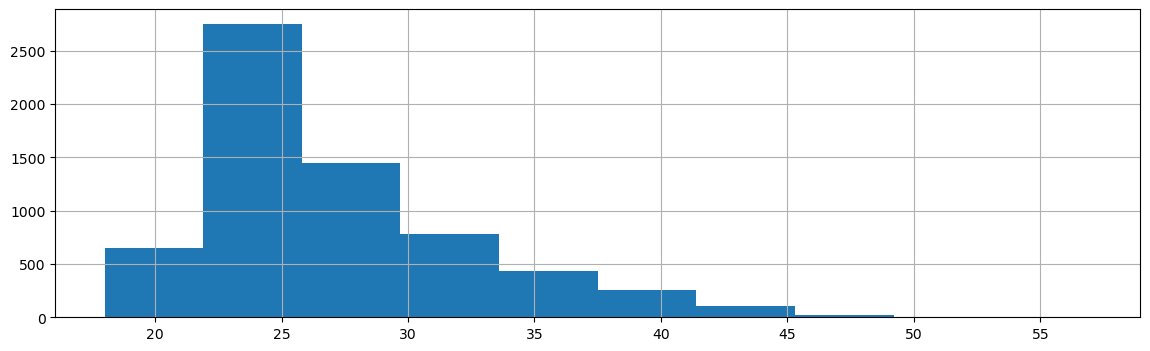

In [67]:
train_df['Age'].hist(figsize=(14,4))

# Splitting Dataset

## Split train data into validation and training datasets

In [68]:
X = train_df_c.drop(["Y","Program End Date","Program Start Date"],axis=1)
y = train_df_c["Y"]


In [69]:
X.head()

,Student ID,Age,Gender,Home Region,Home City,Program ID,Program Main Category Code,Program Sub Category Code,Technology Type,Program Skill Level,...,Completed Degree,Level of Education,Education Speaciality,College,University Degree Score,University Degree Score System,Employment Status,Job Type,Still Working,GPA_Grade
0,1598,37.0,1,4,23,65,6,6,3,3,...,1,0,819,9,2.44,4.0,3,4,2,2
1,97,21.0,1,10,62,180,1,9,3,2,...,1,0,312,6,5.00,5.0,1,4,2,1
2,1126,24.0,1,4,23,197,1,11,3,2,...,1,0,127,9,3.50,5.0,4,4,2,2
3,443,23.0,1,4,23,43,9,10,3,3,...,1,0,575,9,3.55,5.0,0,4,2,2
4,3089,23.0,1,4,23,188,2,9,0,2,...,0,0,747,8,4.00,5.0,6,4,2,5


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)


In [71]:
X_train.shape

(6220, 22)

In [72]:
X_test.shape

(328, 22)

# Modeling

In [160]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 35,
    'learning_rate': 0.0652,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 3,
}


gbm = lgb.train(params,
                train_data,
                num_boost_round=150,
                valid_sets=[train_data, test_data],
                valid_names=['train', 'eval'])

y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Convert probabilities to binary predictions assuming 0.5 threshold
y_pred_binary = [1 if x >= 0.5 else 0 for x in y_pred]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred)  # Note: use y_pred directly as it expects probabilities

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 991, number of negative: 5229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000807 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1190
[LightGBM] [Info] Number of data points in the train set: 6220, number of used features: 22
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.159325 -> initscore=-1.663261
[LightGBM] [Info] Start training from score -1.663261
Accuracy: 0.92
Precision: 0.74
Recall: 0.71
F1 Score: 0.72
ROC AUC: 0.90


In [112]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier
# from lightgbm import gbm

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 7, 9],
    'learning_rate': [0.01, 0.2, 0.45],
    'subsample': [0.65, 0.85, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0.1, 0.3, 0.5],
    'reg_lambda': [0.01, 0.1, 1.0],
    'reg_alpha': [0.01, 0.1, 1.0]
}

# Instantiate the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Perform grid search or randomized search
grid_search = GridSearchCV(xgb_model, param_grid, cv=7, scoring='roc_auc', n_jobs=-1)
random_search = RandomizedSearchCV(xgb_model, param_grid, n_iter=100, cv=7, scoring='roc_auc', n_jobs=-1)

# Fit the grid/random search
grid_search.fit(X_train, y_train)
random_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(best_params, best_model)

{'colsample_bytree': 0.6, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 9, 'reg_alpha': 0.1, 'reg_lambda': 0.01, 'subsample': 0.85} XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


In [74]:
xgb_model.fit(X_train, y_train)
preds = xgb_model.predict(X_test)


In [75]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, preds)

accuracy_percentage = accuracy * 100

print(f"accuracy : {accuracy_percentage:.2f}%")


accuracy : 90.85%


In [76]:
train_df_c.columns

Index(['Student ID', 'Age', 'Gender', 'Home Region', 'Home City', 'Program ID',
       'Program Main Category Code', 'Program Sub Category Code',
       'Technology Type', 'Program Skill Level', 'Program Presentation Method',
       'Program Start Date', 'Program End Date', 'Program Days',
       'Completed Degree', 'Level of Education', 'Education Speaciality',
       'College', 'University Degree Score', 'University Degree Score System',
       'Employment Status', 'Job Type', 'Still Working', 'Y', 'GPA_Grade'],
      dtype='object')

In [77]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
f1 = f1_score(y_test, preds)
recall = recall_score(y_test, preds)
precision = precision_score(y_test, preds)
accuracy = accuracy_score(y_test, preds)

print(f"F1 Score: {f1:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Accuracy: {accuracy:.2f}")


F1 Score: 0.68
Recall: 0.67
Precision: 0.70
Accuracy: 0.91
